In [1]:
#Loading the data
import pandas as pd
store_data = pd.read_csv("/kaggle/input/store-data-analysis/stores data.csv")

In [2]:
store_data

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


In [3]:
#stores that hvae more than 100k in sales
store_data[store_data["Store_Sales"]>100000]

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
408,409,1303,1587,1310,102310
432,433,1365,1638,680,102920
557,558,1137,1374,700,101780
649,650,1989,2414,860,116320
758,759,1486,1758,820,101820
866,867,1565,1854,900,100900
868,869,1775,2104,980,105150


In [4]:
#create new feature column of ration between the sales and area of a store
store_data["Sales_area"] = store_data["Store_Sales"]/store_data["Store_Area"]

In [5]:
#confirming the column created
store_data.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Sales_area
0,1,1659,1961,530,66490,40.078360
1,2,1461,1752,210,39820,27.255305
2,3,1340,1609,720,54010,40.305970
3,4,1451,1748,620,53730,37.029635
4,5,1770,2111,450,46620,26.338983


Text(0, 0.5, 'Frequency')

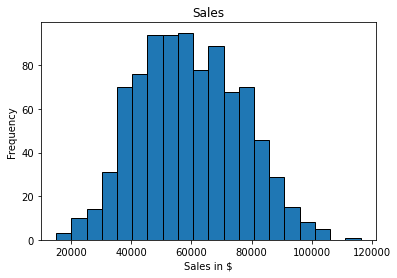

In [6]:
#Creating visual report using sales histogram
import matplotlib.pyplot as plt 
plt.figure()
plt.hist(store_data["Store_Sales"], bins=20, edgecolor="black")
#bin is the width of the 
plt.title("Sales")
plt.xlabel("Sales in $")
plt.ylabel("Frequency")

<AxesSubplot:>

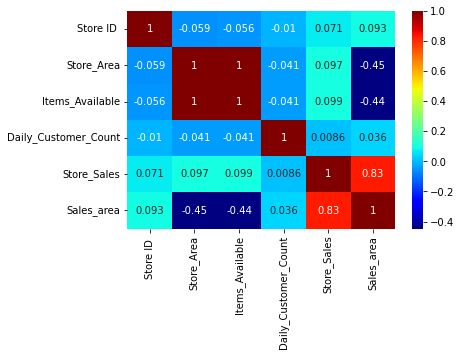

In [7]:
#creating visual report of feature correaltion using heatmap
#In order to understand the relationships between features, we can use the Pearson Correlation Coefficient. Use Pandas to create a correlation matrix of the columns in the data. 
#Then use the seaborn library to visualize these correlation matrix values using a Heatmap.
import seaborn as sns
#creating correlationmatrix
store_data.corr()
#creating heatmap of corr matrix
sns.heatmap(store_data.corr(), annot=True, cmap="jet")

In [8]:
#splitting data into Trainign and testing
from sklearn.model_selection import train_test_split
#creating data and labels
data, labels = store_data.drop(["Store ID ","Store_Sales"], axis=1), store_data["Store_Sales"]    

In [9]:
data

,Store_Area,Items_Available,Daily_Customer_Count,Sales_area
0,1659,1961,530,40.078360
1,1461,1752,210,27.255305
2,1340,1609,720,40.305970
3,1451,1748,620,37.029635
4,1770,2111,450,26.338983
...,...,...,...,...
891,1582,1910,1080,41.965866
892,1387,1663,850,59.178082
893,1200,1436,1060,63.700000
894,1299,1560,770,74.372594


In [10]:
labels

0      66490
1      39820
2      54010
3      53730
4      46620
       ...  
891    66390
892    82080
893    76440
894    96610
895    54340
Name: Store_Sales, Length: 896, dtype: int64

In [11]:
#perfroming train, test and split
X_train, X_test, y_train, y_test = train_test_split(data,labels, test_size = 0.2, random_state = 42)

In [12]:
#creating a linear regression model
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

In [13]:
#fitting into model
linear_regression.fit(X_train, y_train)

LinearRegression()

The RMSE is a commonly used metric to evaluate the performance of a regression model, as it measures the average difference between the predicted and actual values. The lower the RMSE, the better the model's performance.

In [14]:
#Evaluate forecast the results using Regression matrics
from sklearn.metrics import mean_squared_error
preds = linear_regression.predict(X_test)
mean_squared_error(preds, y_test)**0.5

3294.484197549969